# Tyche Example with Simple PV Model

## Set up.

### One only needs to execute the following line once, in order to make sure recent enough packages are installed.

In [1]:
#pip install numpy>=1.17.2 pandas>=0.25.1

### Import packages.

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath("../../src"))

In [3]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import re                as re
import scipy.stats       as st
import seaborn           as sb

# The `tyche` package is located at <https://github.com/NREL/portfolio/tree/master/production-function/framework/src/tyche/>.
import tyche             as ty

from copy import deepcopy

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [4]:
designs = ty.Designs("data/utility_pv")

In [5]:
investments = ty.Investments("data/utility_pv")

### Compile the production and metric functions for each technology in the dataset.

In [6]:
designs.compile()

## Examine the data.

### The `functions` table specifies where the Python code for each technology resides.

In [7]:
designs.functions

,Style,Module,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
Simple pv,numpy,utility_pv,capital_cost,fixed_cost,production,metrics,


Right now, only the style `numpy` is supported.

### The `indices` table defines the subscripts for variables.

In [8]:
designs.indices

Offset               Description  \
Technology Type    Index                                                  
Simple pv  Capital Other Capital Cost       0        Other Capital Cost   
           Input   Solar Radiation          0           Solar Radiation   
           Metric  GHG                      1  Greenhouse gas emissions   
                   LCOE                     0                      Cost   
           Output  Electricity              0               Electricity   

                                                                                   Notes  
Technology Type    Index                                                                  
Simple pv  Capital Other Capital Cost  Placeholder in case other capital costs are ne...  
           Input   Solar Radiation                                                        
           Metric  GHG                                                                    
                   LCOE                                                                   
           Output  Electricity

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [9]:
designs.designs

Value  \
Technology Scenario Variable          Index                       
Simple pv  Base PV  Input             Solar Radiation       5.5   
                    Input efficiency  Solar Radiation     0.152   
                    Input price       Solar Radiation         0   
                    Lifetime          Other Capital Cost     20   
                    Output efficiency Electricity             1   
                    Output price      Electricity         0.092   
                    Scale             NaN                  0.05   

                                                                   Units  \
Technology Scenario Variable          Index                                
Simple pv  Base PV  Input             Solar Radiation         kWh/m2/day   
                    Input efficiency  Solar Radiation                  1   
                    Input price       Solar Radiation     USD/kWh/m2/day   
                    Lifetime          Other Capital Cost              yr   
                    Output efficiency Electricity                      1   
                    Output price      Electricity                USD/kWh   
                    Scale             NaN                      module/yr   

                                                                                                      Notes  
Technology Scenario Variable          Index                                                                  
Simple pv  Base PV  Input             Solar Radiation                                                        
                    Input efficiency  Solar Radiation                             From Kavlak et al. (2018)  
                    Input price       Solar Radiation                                                        
                    Lifetime          Other Capital Cost  Assumed, Kavlak et al. (2019) do not provide a...  
                    Output efficiency Electricity                         No output inverter losses assumed  
                    Output price      Electricity                     Average commercial rate in Denver, CO  
                    Scale             NaN                 Inverse of lifetime. Constant needed to leveli...

### The `parameters` table contains additional techno-economic parameters for each technology.

In [10]:
designs.parameters

Offset     Value        Units  \
Technology Scenario Parameter                                                   
Simple pv  Base PV  Cells per module                 0        72  cell/module   
                    GHG factor for electricity      13       400    gCO2e/kWh   
                    Module area utilization         12       0.9     unitless   
                    Non-silicon materials cost       6  0.009433   $/cm2/cell   
                    Plant size                       8      1000        MW/yr   
                    Polysilicon price                4        26         $/kg   
                    Production yield                11      0.95     unitless   
                    Reference plant cost             7    1.5513       $/cell   
                    Reference plant size             9      1000        MW/yr   
                    Scaling factor                  10      0.27     unitless   
                    Silicon utilization              5      0.45     unitless   
                    Wafer area                       1       243          cm2   
                    Wafer density                    3      2.33        g/cm3   
                    Wafer thickness                  2       180           um   

                                                                                            Notes  
Technology Scenario Parameter                                                                      
Simple pv  Base PV  Cells per module                                    From Kavlak et al. (2018)  
                    GHG factor for electricity                    Rough approximation for US Grid  
                    Module area utilization                             From Kavlak et al. (2018)  
                    Non-silicon materials cost  Calculated based on data from Kavlak et al. (2...  
                    Plant size                  From Kavlak et al. (2018). Equivalent to 3.35E...  
                    Polysilicon price                            2015$. From Kavlak et al. (2018)  
                    Production yield            Production waste parameter. Include as an outp...  
                    Reference plant cost        Calculated based on data from Kavlak et al. (2...  
                    Reference plant size        From Kavlak et al. (2018). Equivalent to 3.35E...  
                    Scaling factor                                      From Kavlak et al. (2018)  
                    Silicon utilization                                 From Kavlak et al. (2018)  
                    Wafer area                                          From Kavlak et al. (2018)  
                    Wafer density                                       From Kavlak et al. (2018)  
                    Wafer thickness                                     From Kavlak et al. (2018)

### The `results` table specifies the units of measure for results of computations.

In [11]:
designs.results

Units Notes
Technology Variable Index                          
Simple pv  Cost     Cost           USD/module      
           Metric   GHG          gCO2e/module      
                    LCOE              USD/kWh      
           Output   Electricity    kWh/module

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Cateogry`.

In [12]:
investments.tranches

Amount Notes
Category Tranche       Scenario                                
PV R&D   High PV R&D   Fast Progress on PV      1000000.0      
         Low PV R&D    Slow Progress on PV      3000000.0      
         Medium PV R&D Moderate Progress on PV  4500000.0      
         No PV R&D     Base PV                  1500000.0

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [13]:
investments.investments

,,,Notes
Investment,Category,Tranche,
No R&D Spending,PV R&D,No PV R&D,


## Evaluate the scenarios in the dataset.

In [14]:
scenario_results = designs.evaluate_scenarios()

Evaluating Simple pv


/Users/tghosh/miniconda3/envs/tyche/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:373: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  costs   = costs.append(  result.cost  )
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:374: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outputs = outputs.append(result.output)
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:375: FutureWarning: 

In [15]:
scenario_results.xs(1, level="Sample", drop_level=False)

Value         Units
Technology Scenario Sample Variable Index                                  
Simple pv  Base PV  1      Cost     Cost        -7.177702e+02    USD/module
                           Metric   GHG          4.508260e+06  gCO2e/module
                                    LCOE        -6.368489e-02       USD/kWh
                           Output   Electricity  1.127065e+04    kWh/module

### Save results.

In [16]:
scenario_results.to_csv("output/utility_pv/results.csv")

# NOTE: Items below have not been updated for simple PV module...

### Plot GHG metric.

/var/folders/sm/spdh5zkx26v6vh_fk8w7p8456l6sp0/T/ipykernel_84153/4168782161.py:4: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  data=scenario_results.xs(


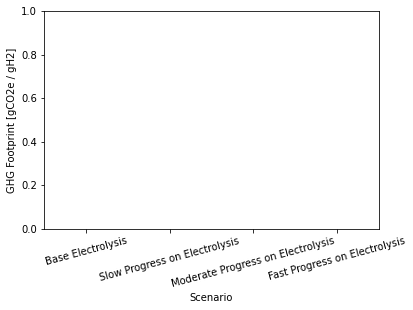

In [17]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ["Metric", "GHG"],
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=["Base Electrolysis", "Slow Progress on Electrolysis", "Moderate Progress on Electrolysis", "Fast Progress on Electrolysis"]
)
g.set(ylabel="GHG Footprint [gCO2e / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

### Plot cost metric.

/var/folders/sm/spdh5zkx26v6vh_fk8w7p8456l6sp0/T/ipykernel_84153/4116776311.py:4: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  data=scenario_results.xs(


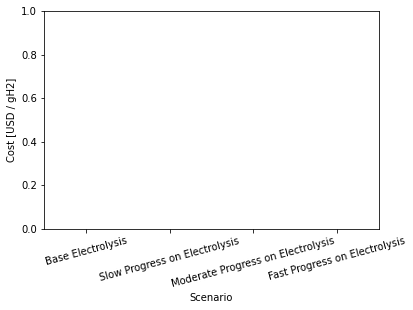

In [18]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ["Metric", "Cost"],
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=["Base Electrolysis", "Slow Progress on Electrolysis", "Moderate Progress on Electrolysis", "Fast Progress on Electrolysis"]
)
g.set(ylabel="Cost [USD / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

### Plot employment metric.

## Evaluate the investments in the dataset.

In [20]:
investment_results = investments.evaluate_investments(designs, sample_count=50)

Evaluating Simple pv


/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Investments.py:118: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  amounts = self.investments.drop(
/Users/tghosh/miniconda3/envs/tyche/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/tghosh/miniconda3/envs/tyche/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.

### Costs of investments.

In [21]:
investment_results.amounts

,Amount
Investment,
No R&D Spending,1500000.0


### Benefits of investments.

In [22]:
investment_results.metrics.xs(1, level="Sample", drop_level=False)

Value  \
Investment      Category Tranche   Scenario Sample Technology Index                  
No R&D Spending PV R&D   No PV R&D Base PV  1      Simple pv  GHG    4.514119e+209   
                                                              LCOE             inf   

                                                                            Units  
Investment      Category Tranche   Scenario Sample Technology Index                
No R&D Spending PV R&D   No PV R&D Base PV  1      Simple pv  GHG    gCO2e/module  
                                                              LCOE        USD/kWh

In [23]:
investment_results.summary.xs(1, level="Sample", drop_level=False)

Value         Units
Investment      Technology Sample Index                             
No R&D Spending Simple pv  1      GHG    4.514119e+209  gCO2e/module
                                  LCOE             inf       USD/kWh

### Save results.

In [24]:
investment_results.amounts.to_csv("example-investment-amounts.csv")

In [25]:
investment_results.metrics.to_csv("example-investment-metrics.csv")

### Plot GHG metric.

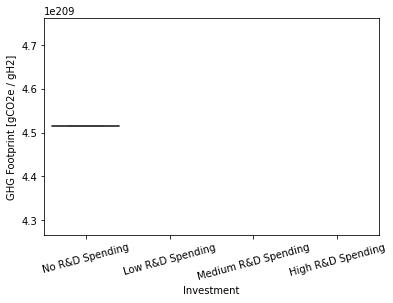

In [26]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "GHG",
        level="Index"
    ).reset_index()[["Investment", "Value"]],
    order=["No R&D Spending", "Low R&D Spending", "Medium R&D Spending", "High R&D Spending"]
)
g.set(ylabel="GHG Footprint [gCO2e / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

### Plot cost metric.

/Users/tghosh/miniconda3/envs/tyche/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


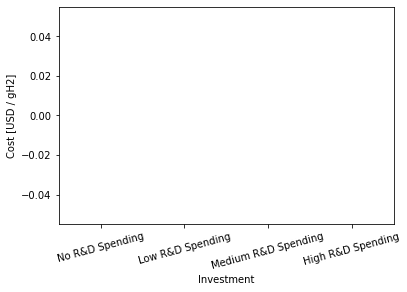

In [28]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "LCOE",
        level="Index"
    ).reset_index()[["Investment", "Value"]],
    order=["No R&D Spending", "Low R&D Spending", "Medium R&D Spending", "High R&D Spending"]
)
g.set(ylabel="Cost [USD / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

### Plot employment metric.

In [29]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "Jobs",
        level="Index"
    ).reset_index()[["Investment", "Value"]],
    order=["No R&D Spending", "Low R&D Spending", "Medium R&D Spending", "High R&D Spending"]
)
g.set(ylabel="Employment [job / gH2]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

KeyError: 'Jobs'

## Sensitity analysis.

### Vary the four efficiencies in the design.

In [ ]:
# Four variables are involved.
variables = [
    ("Input efficiency" , "Water"      ),
    ("Input efficiency" , "Electricity"),
    ("Output efficiency", "Oxygen"     ),
    ("Output efficiency", "Hydrogen"   ),
]

In [ ]:
# Let efficiencies range from 0.75 to 0.975.
efficiencies = np.arange(0.750, 1.000, 0.025)
efficiencies

### Start from the base case.

In [ ]:
base_design = designs.designs.xs("Base Electrolysis", level=1, drop_level=False)
base_design

In [ ]:
base_parameters = designs.parameters.xs("Base Electrolysis", level=1, drop_level=False)
base_parameters

### Generate the new scenarios and append them to the previous ones.

In [ ]:
sensitivities = deepcopy(designs)
sensitivities.designs = sensitivities.designs[0:0]
sensitivities.parameters = sensitivities.parameters[0:0]

In [ ]:
# Iterate over variables and efficiencies.
for variable, index in variables:
    for efficiency in efficiencies:

        # Name the scenario.
        scenario = "Let " + variable + " @ " + index + " = " + str(round(efficiency, 3))
        
        # Alter the base case.
        vary_design = base_design.rename(index={"Base Electrolysis" : scenario}, level=1)
        vary_design.loc[("Simple electrolysis", scenario, variable, index), "Value"] = efficiency
        
        # Keep the parameters the same.
        vary_parameters = base_parameters.rename(index={"Base Electrolysis" : scenario}, level=1)
        
        # Append the results to the existing table of scenarios.
        sensitivities.designs = sensitivities.designs.append(vary_design)
        sensitivities.parameters = sensitivities.parameters.append(vary_parameters)

#### Remember to compile the design, since we've added scenarios.

In [ ]:
sensitivities.compile()

#### See how many rows there are in the tables now.

In [ ]:
sensitivities.designs.shape

In [ ]:
sensitivities.parameters.shape

In [ ]:
sensitivities.designs

### Compute the results.

In [ ]:
results = sensitivities.evaluate_scenarios(1)
results

### Plot the cost results.

In [ ]:
cost_results = results.xs("Cost", level="Variable").reset_index()[["Scenario", "Value"]]

In [ ]:
cost_results[0:10]

In [ ]:
cost_results["Variable"  ] = cost_results["Scenario"].apply(lambda x: re.sub(r'^Let (.*) @ (.*) =.*$', '\\1[\\2]', x))
cost_results["Efficiency"] = cost_results["Scenario"].apply(lambda x: float(re.sub(r'^.*= (.*)$', '\\1', x)))
cost_results["Cost [USD/mole]"] = cost_results["Value"]

In [ ]:
cost_results = cost_results[["Variable", "Efficiency", "Cost [USD/mole]"]]
cost_results[0:10]

In [ ]:
# Here is a really simple plot.
cost_results.plot(
    x="Efficiency",
    y="Cost [USD/mole]",
    c=cost_results["Variable"].apply(lambda v: {
        "Input efficiency[Water]"       : "blue"  ,
        "Input efficiency[Electricity]" : "orange",
        "Output efficiency[Oxygen]"     : "green" ,
        "Output efficiency[Hydrogen]"   : "red"   ,
    }[v]),
    kind="scatter"
)